# Text Mining Assignment 1

#### Packages and Data Reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import spacy

tbbt = pd.read_csv("C:/Users/bryce/Documents/@ Education\KUL/Year 3 Semester 1/Text Mining/Scripts TBBT.csv")

<>:18: SyntaxWarning: invalid escape sequence '\K'
<>:18: SyntaxWarning: invalid escape sequence '\K'
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\3061437660.py:18: SyntaxWarning: invalid escape sequence '\K'
  tbbt = pd.read_csv("C:/Users/bryce/Documents/@ Education\KUL/Year 3 Semester 1/Text Mining/Scripts TBBT.csv")
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bryce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bryce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bryce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 11.8 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/12.8 MB 11.7 MB/s eta 0:00:01
     --------------------- ------------------ 6.8/12.8 MB 11.7 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 11.7 MB/s eta 0:00:01
     ----------------------------------- --- 11.8/12.8 MB 11.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 11.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### Data Preparation

In [4]:
leonard = tbbt[tbbt["person_scene"] == "Leonard"]
leonard.head(10)

,episode_name,dialogue,person_scene
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
6,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard
8,Series 01 Episode 01 – Pilot Episode,"Yes. Um, is this the High IQ sperm bank?",Leonard
12,Series 01 Episode 01 – Pilot Episode,Thank-you. We’ll be right back.,Leonard
15,Series 01 Episode 01 – Pilot Episode,"What, are you kidding? You’re a semi-pro.",Leonard
17,Series 01 Episode 01 – Pilot Episode,"Sheldon, this was your idea. A little extra m...",Leonard
19,Series 01 Episode 01 – Pilot Episode,I’m sure she’ll still love him.,Leonard
21,Series 01 Episode 01 – Pilot Episode,"Well, what do you want to do?",Leonard
23,Series 01 Episode 01 – Pilot Episode,Okay.,Leonard


In [5]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
### Process Text

#Functions for text processing (Removing stopwords and applying PorterStemmer)
def remove_stopwords(words):
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))    
    # Filter out the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

def stemmer(words):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

#Tokenize sentences
leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))

#Delete punctuation
leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))

#Tokenize Words
leonard["words"] = leonard["dialogue"].apply(lambda x : word_tokenize(x))

#Removing Stopwords
leonard["words"] = leonard["words"].apply(lambda x : remove_stopwords(x))

# POS Tagging and NER

def pos_tagging(words):
    # Join the words list back into a single string
    text = " ".join(words)
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]    
    return pos_tags

def ner(words):
    text = " ".join(words)
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

leonard["POS"] = leonard["words"].apply(lambda x : pos_tagging(x)) 
leonard["NER"] = leonard["words"].apply(lambda x : ner(x)) 

#Lowercase
def lowercasing(words):
    lowercased = [word.lower() for word in words]
    return lowercased
leonard["words"] = leonard["words"].apply(lambda x : lowercasing(x))

#Applying PorterStemmer
leonard["words"] = leonard["words"].apply(lambda x : stemmer(x))

C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2330282147.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2330282147.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2330282147.py:23: SettingWithCopyWarning: 
A value is trying to be set on

### Question 1

##### Sentences and words per episode

In [8]:
#Making columns for number of sentences and words
leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))

#Group by episode, sum and make mean
print(leonard.groupby('episode_name')['nr_sentences'].sum().mean())
print(leonard.groupby('episode_name')['nr_words'].sum().mean())

61.926406926406926
209.39826839826839


C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\4024592200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\4024592200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))


##### Variation across seasons

In [9]:
#Group by season, make mean of sums of sentences
leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])
print(leonard.groupby(['Season', 'episode_name'])['nr_sentences'].sum().groupby('Season').mean())

Season
Series 01    91.764706
Series 02    78.695652
Series 03    75.739130
Series 04    66.541667
Series 05    61.291667
Series 06    53.416667
Series 07    54.208333
Series 08    54.208333
Series 09    49.875000
Series 10    43.500000
Name: nr_sentences, dtype: float64


C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2356514820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])


In [10]:
#Group by season, make mean of sums of words
print(leonard.groupby(['Season', 'episode_name'])['nr_words'].sum().groupby('Season').mean())

Season
Series 01    348.058824
Series 02    267.000000
Series 03    242.739130
Series 04    205.000000
Series 05    199.875000
Series 06    179.875000
Series 07    182.250000
Series 08    188.625000
Series 09    167.500000
Series 10    157.291667
Name: nr_words, dtype: float64


#### Question 2

##### Data Processing

In [11]:
#Take nouns and person names from POS and NER
def select_nouns(pos):
    nouns = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() != "penny":
            nouns.append(tuplee[0])
    return nouns

def select_personnames(ner):
    person_names = []
    for tuplee in ner:
        if tuplee[1] == "PERSON":
            person_names.append(tuplee[0])
    return person_names

def add_penny(pos):
    times_penny = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() == "penny":
            times_penny.append("penny")
    return times_penny

            
leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
leonard['penny'] = leonard["POS"].apply(lambda x : add_penny(x))
leonard['personnames'] = leonard.apply(lambda row : row['personnames'] + row['penny'], axis = 1)

#Apply lowercasing again for both nouns and person names
leonard["nouns"] = leonard["nouns"].apply(lambda x : lowercasing(x))
leonard["personnames"] = leonard["personnames"].apply(lambda x : lowercasing(x))

#Collect a list with all nouns and a list with all person names
def collect(colname):
    list_all = []
    for listt in leonard[colname]:
        list_all.extend(listt)
    return list_all

C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2746861802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2746861802.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\2746861802.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

##### How many nouns and person names are mentioned?

In [12]:
allnouns = collect("nouns")
print("Number of nouns mentioned:")
print(len(allnouns))
print("Number of unique nouns mentioned:")
print(len(set(allnouns)))

allnames = collect("personnames")
print("Number of person names mentioned:")
print(len(allnames))
print("Number of unique person names mentioned:")
print(len(set(allnames)))


Number of nouns mentioned:
12694
Number of unique nouns mentioned:
3527
Number of person names mentioned:
1336
Number of unique person names mentioned:
589


##### Wordclouds and Barcharts for nouns and person names

In [13]:
#Count occurrences of each word and name
nouncounts = Counter(allnouns)
namecounts = Counter(allnames)

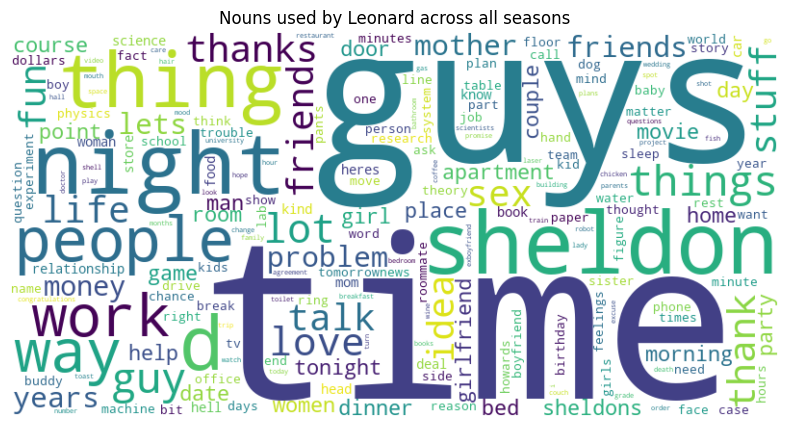

In [14]:
# Generate word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nouncounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nouns used by Leonard across all seasons")
plt.axis("off")
plt.show()

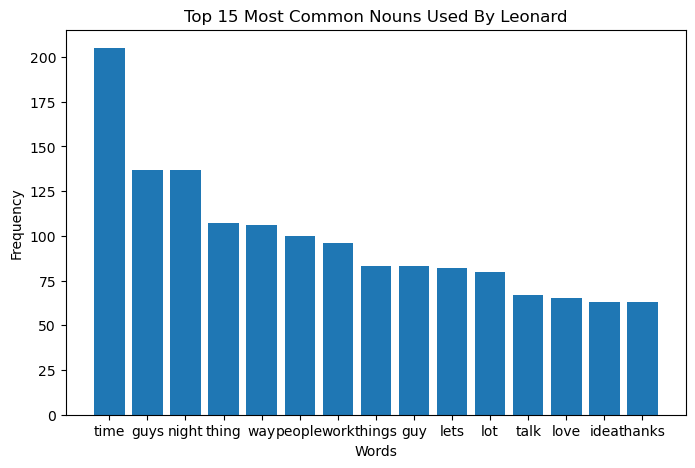

In [102]:
#Generate bar chart for nouns
top_15_nouns = nouncounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_nouns)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Nouns Used By Leonard')
plt.show()

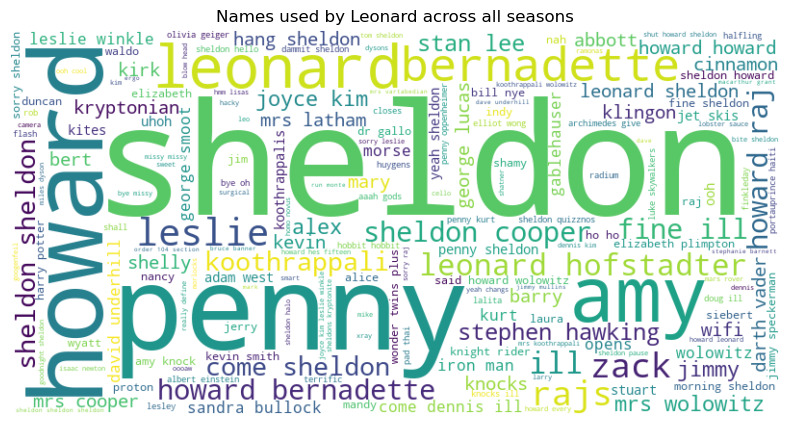

In [103]:
# Generate word cloud for names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(namecounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Names used by Leonard across all seasons")
plt.axis("off")
plt.show()

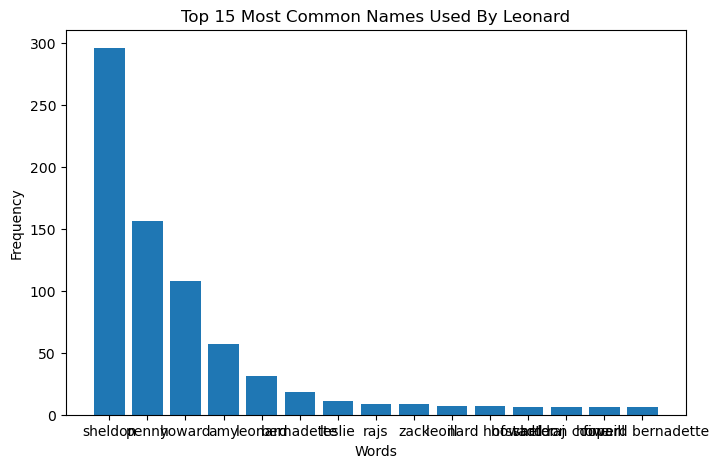

In [104]:
#Generate bar chart for names
top_15_names = namecounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_names)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Names Used By Leonard')
plt.show()

## Question 3

### Analysis based on Bag of Words

In [16]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In order to apply countvectorizer for the Bag of Words, i will transform the pre-processed words again into a verctor

In [27]:
# Join the processed words back into a single string for each dialogue
leonard["processed_dialogue"] = leonard["words"].apply(lambda x: " ".join(x))

# Check the new 'processed_dialogue' column
print(leonard[['dialogue', 'processed_dialogue']].head())

                                             dialogue  \
2                             Agreed whats your point   
4                                           Excuse me   
6    One across is Aegean eight down is Nabakov tw...   
8               Yes Um is this the High IQ sperm bank   
12                        Thankyou Well be right back   

                                   processed_dialogue  
2                                     agre what point  
4                                               excus  
6   one across aegean eight nabakov twentysix acro...  
8                            ye um high iq sperm bank  
12                           thankyou well right back  


C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\3290730351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["processed_dialogue"] = leonard["words"].apply(lambda x: " ".join(x))


In [28]:
# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed dialogue into a word count matrix
X = vectorizer.fit_transform(leonard["processed_dialogue"])

# Convert the word count matrix to a DataFrame for easy viewing
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Check the word frequency DataFrame
print(word_freq_df.head())


   000318914  10  100  104  10th  11  12  128  13  14  ...  zebra  zelda  zen  \
0          0   0    0    0     0   0   0    0   0   0  ...      0      0    0   
1          0   0    0    0     0   0   0    0   0   0  ...      0      0    0   
2          0   0    0    0     0   0   0    0   0   0  ...      0      0    0   
3          0   0    0    0     0   0   0    0   0   0  ...      0      0    0   
4          0   0    0    0     0   0   0    0   0   0  ...      0      0    0   

   zero  zerograv  zip  zod  zombi  zone  zoo  
0     0         0    0    0      0     0    0  
1     0         0    0    0      0     0    0  
2     0         0    0    0      0     0    0  
3     0         0    0    0      0     0    0  
4     0         0    0    0      0     0    0  

[5 rows x 5536 columns]


#### Bag of Words: Most frequent words of the first 10 seasons

In [29]:
# Sum word counts across all dialogues to find the most frequent words
total_word_freq = word_freq_df.sum(axis=0)

# Sort the words by frequency
sorted_word_freq = total_word_freq.sort_values(ascending=False)

# Display the top 10 most frequent words
print(sorted_word_freq.head(10))

im         808
go         736
dont       699
know       665
oh         629
sheldon    623
well       542
yeah       530
get        489
okay       478
dtype: int64


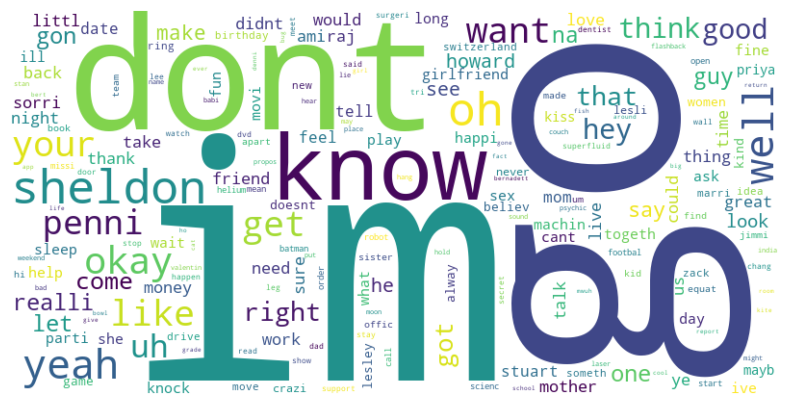

In [48]:
# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(total_word_freq)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

#### Bag of Words: Most frequent words per episodes

In [32]:
# Fit and transform the processed dialogue for each episode
# Iterate over each episode to get the top 10 words per episode
top_words_per_episode = {}

for episode in leonard['episode_name'].unique():
    # Get the processed dialogues for the current episode
    episode_dialogues = leonard[leonard['episode_name'] == episode]['processed_dialogue']
    
    # Fit and transform the processed dialogues into a word count matrix
    X = vectorizer.fit_transform(episode_dialogues)
    
    # Convert the word count matrix to a DataFrame
    word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Sum word counts across all dialogues in the episode
    total_word_freq = word_freq_df.sum(axis=0)
    
    # Sort words by frequency
    sorted_word_freq = total_word_freq.sort_values(ascending=False)
    
    # Get the top 10 words for the current episode
    top_words_per_episode[episode] = sorted_word_freq.head(10)

# Print the top 10 words for each episode
for episode, top_words in top_words_per_episode.items():
    print(f"Top 10 Words for {episode}:")
    print(top_words)
    print("\n")

Top 10 Words for Series 01 Episode 01 – Pilot Episode:
im         16
well       14
sheldon    11
say         8
dont        8
go          8
uh          8
hi          7
good        7
oh          7
dtype: int64


Top 10 Words for Series 01 Episode 02 – The Big Bran Hypothesis:
go         10
penni      10
oh          9
sheldon     7
okay        7
dont        7
well        5
your        5
im          4
yeah        4
dtype: int64


Top 10 Words for Series 01 Episode 03 – The Fuzzy Boots Corollary:
im       16
go       16
right    11
oh        9
know      9
good      7
well      7
yeah      7
littl     6
kiss      6
dtype: int64


Top 10 Words for Series 01 Episode 04 – The Luminous Fish Effect:
sheldon    6
fish       5
like       5
go         4
well       4
sound      3
back       3
egg        3
know       3
realli     3
dtype: int64


Top 10 Words for Series 01 Episode 05 – The Hamburger Postulate:
lesley    12
im        11
happi     10
penni     10
yeah       9
good       6
know       6
t

I would like to visualize the evolution of most important words used by Leonard across the episodes. I think this can be more informative than making wordclouds for every episode. In order to avoid an overload of information i selected the first 5 and last 5 episodes. This selection provides the necessary descriptive characteristics of the evolution.

In [74]:
# Sort episodes based on their order (assuming episode_name has a sortable format)
sorted_episodes = sorted(leonard['episode_name'].unique())

# Get the first 5 and last 5 episodes
selected_episodes = sorted_episodes[:5] + sorted_episodes[-5:]

# Filter the top words data to include only these episodes
filtered_top_words = {episode: top_words_per_episode[episode] for episode in selected_episodes}

In [75]:
# Function to extract series and episode numbers and format as "Sxx Exx"
def format_episode_label(episode_name):
    match = re.match(r"Series (\d{2}) Episode (\d{2})", episode_name)
    if match:
        series_num = match.group(1)  # Extract series number
        episode_num = match.group(2)  # Extract episode number
        return f"S{series_num} E{episode_num}"
    return episode_name  # Return the original if no match is found

# Apply the function to the episode_name column to create the new labels
short_episode_labels = leonard['episode_name'].apply(format_episode_label).unique()

# Example of checking the result
print(short_episode_labels)

['S01 E01' 'S01 E02' 'S01 E03' 'S01 E04' 'S01 E05' 'S01 E06' 'S01 E07'
 'S01 E08' 'S01 E09' 'S01 E10' 'S01 E11' 'S01 E12' 'S01 E13' 'S01 E14'
 'S01 E15' 'S01 E16' 'S01 E17' 'S02 E01' 'S02 E02' 'S02 E03' 'S02 E04'
 'S02 E05' 'S02 E06' 'S02 E07' 'S02 E08' 'S02 E09' 'S02 E10' 'S02 E11'
 'S02 E12' 'S02 E13' 'S02 E14' 'S02 E15' 'S02 E16' 'S02 E17' 'S02 E18'
 'S02 E19' 'S02 E20' 'S02 E21' 'S02 E22' 'S02 E23' 'S03 E01' 'S03 E02'
 'S03 E03' 'S03 E04' 'S03 E05' 'S03 E06' 'S03 E07' 'S03 E08' 'S03 E09'
 'S03 E10' 'S03 E11' 'S03 E12' 'S03 E13' 'S03 E14' 'S03 E15' 'S03 E16'
 'S03 E17' 'S03 E18' 'S03 E19' 'S03 E20' 'S03 E21' 'S03 E22' 'S03 E23'
 'S04 E01' 'S04 E02' 'S04 E03' 'S04 E04' 'S04 E05' 'S04 E06' 'S04 E07'
 'S04 E08' 'S04 E09' 'S04 E10' 'S04 E11' 'S04 E12' 'S04 E13' 'S04 E14'
 'S04 E15' 'S04 E16' 'S04 E17' 'S04 E18' 'S04 E19' 'S04 E20' 'S04 E21'
 'S04 E22' 'S04 E23' 'S04 E24' 'S05 E01' 'S05 E02' 'S05 E03' 'S05 E04'
 'S05 E05' 'S05 E06' 'S05 E07' 'S05 E08' 'S05 E09' 'S05 E10' 'S05 E11'
 'S05 

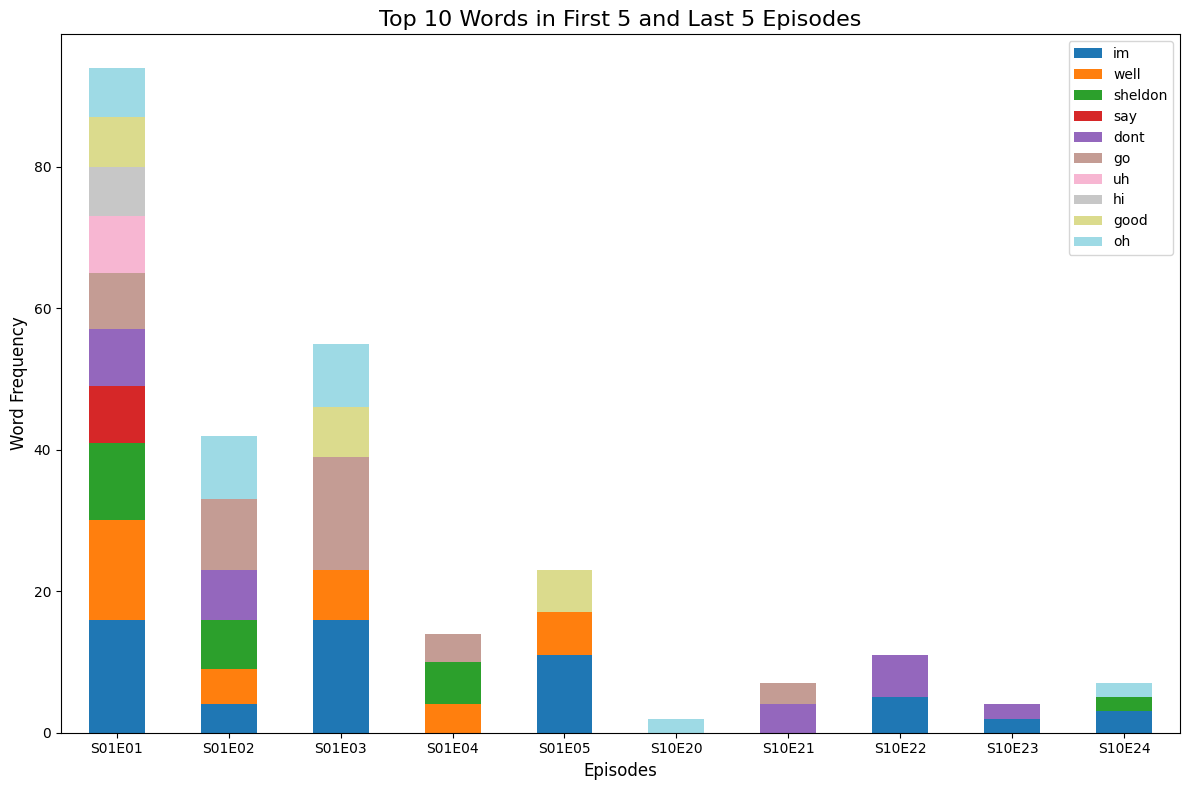

In [76]:
# Create an empty DataFrame to store the word frequencies for the selected episodes
filtered_top_words_df = pd.DataFrame(columns=filtered_top_words[next(iter(filtered_top_words))].index)

# Fill the DataFrame with the word frequencies for the selected episodes
for episode, top_words in filtered_top_words.items():
    filtered_top_words_df.loc[episode] = top_words

# Plot the stacked bar chart
filtered_top_words_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

# Set the title and labels
plt.title("Top 10 Words in First 5 and Last 5 Episodes", fontsize=16)
plt.xlabel("Episodes", fontsize=12)  # Set custom label here
plt.ylabel("Word Frequency", fontsize=12)

# Custom x-axis labels as you requested
custom_labels = ['S01E01', 'S01E02', 'S01E03', 'S01E04', 'S01E05', 
                 'S10E20', 'S10E21', 'S10E22', 'S10E23', 'S10E24']

# Set the x-ticks and labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

#### Bag of Words: Most frequent words per season

In [78]:
# Initialize a dictionary to store top words for each season
top_words_per_season = {}

# Iterate over each season to get the top 10 words
for season in leonard['Season'].unique():
    # Get the processed dialogues for the current season
    season_dialogues = leonard[leonard['Season'] == season]['processed_dialogue']
    
    # Fit and transform the processed dialogues into a word count matrix
    X = vectorizer.fit_transform(season_dialogues)
    
    # Convert the word count matrix to a DataFrame
    word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Sum word counts across all dialogues in the season
    total_word_freq = word_freq_df.sum(axis=0)
    
    # Sort words by frequency
    sorted_word_freq = total_word_freq.sort_values(ascending=False)
    
    # Get the top 10 words for the current season
    top_words_per_season[season] = sorted_word_freq.head(10)

# Print the top 10 words for each season
for season, top_words in top_words_per_season.items():
    print(f"Top 10 Words for Season {season}:")
    print(top_words)
    print("\n")

Top 10 Words for Season Series 01:
go         122
im         110
sheldon     90
oh          84
penni       77
dont        72
know        70
well        69
okay        64
get         51
dtype: int64


Top 10 Words for Season Series 02:
go         134
sheldon     97
dont        94
im          88
yeah        85
know        78
okay        74
well        69
oh          69
penni       64
dtype: int64


Top 10 Words for Season Series 03:
go         111
im          92
sheldon     85
dont        84
yeah        74
oh          67
want        66
know        62
okay        60
penni       57
dtype: int64


Top 10 Words for Season Series 04:
im         84
go         71
oh         71
know       66
sheldon    64
dont       63
okay       60
yeah       58
your       57
well       54
dtype: int64


Top 10 Words for Season Series 05:
im         103
go          78
sheldon     68
dont        61
know        59
oh          54
uh          51
want        50
your        50
yeah        50
dtype: int64


Top 10 Wor

The following graph makes these insights visually appealing. It visualizes the top 10 words for every season and allows to define a longitudinal trend. There are multiple trends visible. While the majority of these frequent words stay the same across the seasons, meaning that the same important words have been re-used multiple times throughout the episodes, some terms were kicked out and replace by another word. As an illustration, "penni" seemed to be an important word during the first three seasons and is most probably replaced by the word "want".

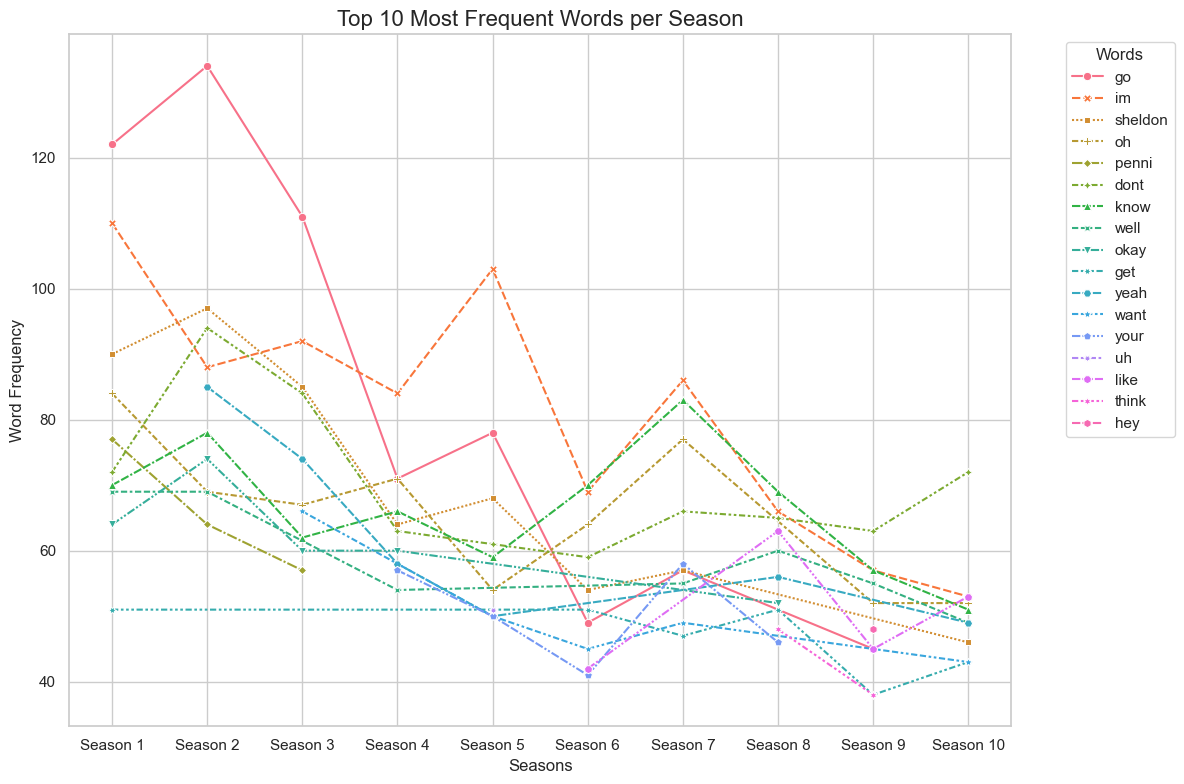

In [97]:
# Create a DataFrame to store the word frequencies for all seasons
# Initialize a list to collect all words, preserving their order
all_words = []

# Collect all unique words across seasons for the plot
for season, top_words in top_words_per_season.items():
    all_words.extend(top_words.index)

# Remove duplicates by converting to a set and then back to a list (to maintain order)
all_words = list(dict.fromkeys(all_words))

# Create a DataFrame where rows are words and columns are seasons
word_frequencies_df = pd.DataFrame(index=all_words)

# Populate the DataFrame with the top word frequencies per season
for season, top_words in top_words_per_season.items():
    for word, freq in top_words.items():
        word_frequencies_df.at[word, f'Season {season}'] = freq

# Fill NaN values with 0 (in case a word is not in a particular season's top 10)
word_frequencies_df = word_frequencies_df.fillna(0)

# Replace zeros with NaN so they are treated as missing values
word_frequencies_df = word_frequencies_df.replace(0, pd.NA)

# Plot the line graph
plt.figure(figsize=(12, 8))  # Set figure size
sns.lineplot(data=word_frequencies_df.T, markers=True, linestyle='-', marker='o')

# Add labels and title
plt.title('Top 10 Most Frequent Words per Season', fontsize=16)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Word Frequency', fontsize=12)

# Custom x-axis labels as you requested
custom_labels = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 
                 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']

# Set the x-ticks and labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=0)

# Adjust the legend and layout
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

As can be noted, the results provided by the Word of Bag technique does not contain very valuable informational content. Therefore, the Term Frequency - Inverse Document Frequency technique has also been applied on this dataset.

## Analysis based on Term Frequency - Inverse Document Frequency

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=10):
    top_words = []
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i].toarray().flatten()
        top_indices = row.argsort()[-top_n:][::-1]
        top_terms = [(feature_names[idx], row[idx]) for idx in top_indices]
        top_words.append(top_terms)
    return top_words

# Aggregate dialogues by episode
episode_dialogues = leonard.groupby('episode_name')['dialogue'].apply(' '.join).reset_index()


In [111]:
# Vectorize dialogues per episode
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_episode = tfidf_vectorizer.fit_transform(episode_dialogues['dialogue'])
feature_names_episode = tfidf_vectorizer.get_feature_names_out()

#### TD-IDF: Most frequent words per episode (and rarest words)

In [117]:
# Top N frequent and rarest words
def get_top_and_rare_words(tfidf_matrix, feature_names, top_n=10):
    frequent_words = []
    rarest_words = []
    
    for i in range(tfidf_matrix.shape[0]):
        row = tfidf_matrix[i].toarray().flatten()
        
        # Get top N frequent words
        top_indices = row.argsort()[-top_n:][::-1]
        frequent_terms = [(feature_names[idx], row[idx]) for idx in top_indices if row[idx] > 0]
        frequent_words.append(frequent_terms)
        
        # Get top N rarest words (non-zero scores)
        rare_indices = [idx for idx in row.argsort() if row[idx] > 0][:top_n]
        rare_terms = [(feature_names[idx], row[idx]) for idx in rare_indices]
        rarest_words.append(rare_terms)
    
    return frequent_words, rarest_words

# Get top frequent and rare words per episode
frequent_words_per_episode, rarest_words_per_episode = get_top_and_rare_words(tfidf_matrix_episode, feature_names_episode)

# Add results to DataFrame
episode_dialogues['Top_10_Frequent_Words'] = frequent_words_per_episode
episode_dialogues['Top_10_Rarest_Words'] = rarest_words_per_episode

# Display sample output
print("Most Frequent and Rarest Words per Episode:")
print(episode_dialogues[['episode_name', 'Top_10_Frequent_Words', 'Top_10_Rarest_Words']].head())


Most Frequent and Rarest Words per Episode:
                                       episode_name  \
0              Series 01 Episode 01 – Pilot Episode   
1    Series 01 Episode 02 – The Big Bran Hypothesis   
2  Series 01 Episode 03 – The Fuzzy Boots Corollary   
3   Series 01 Episode 04 – The Luminous Fish Effect   
4    Series 01 Episode 05 – The Hamburger Postulate   

                               Top_10_Frequent_Words  \
0  [(to, 0.24754113920842855), (the, 0.1739833725...   
1  [(the, 0.22068722738129035), (to, 0.2134316132...   
2  [(the, 0.2838047656354453), (you, 0.2159384086...   
3  [(fish, 0.3051467253777617), (you, 0.223586759...   
4  [(lesley, 0.5288741837233881), (you, 0.2142608...   

                                 Top_10_Rarest_Words  
0  [(yeah, 0.008659036055666305), (want, 0.009460...  
1  [(with, 0.009184899355162576), (hey, 0.0102026...  
2  [(how, 0.008197907704835378), (got, 0.00902703...  
3  [(have, 0.015635159398447007), (oh, 0.01570316...  
4  [(its, 0.0

#### TD-IDF: Most frequent words per season

In [118]:
# Assuming the episode_name includes season info (like S01E01 format), extract season
leonard['Season'] = leonard['episode_name'].str.extract(r'(S\d{2})')

# Aggregate dialogues by season
season_dialogues = leonard.groupby('Season')['dialogue'].apply(' '.join).reset_index()

# Vectorize dialogues per season
tfidf_matrix_season = tfidf_vectorizer.fit_transform(season_dialogues['dialogue'])
feature_names_season = tfidf_vectorizer.get_feature_names_out()

# Get top 10 words for each season
season_dialogues['Top_10_TFIDF_Season'] = get_top_tfidf_words(tfidf_matrix_season, feature_names_season)

# Print top 10 words for each season
print(season_dialogues[['Season', 'Top_10_TFIDF_Season']])


C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\3465473838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['Season'] = leonard['episode_name'].str.extract(r'(S\d{2})')


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [105]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_episode = tfidf_vectorizer.fit_transform(leonard['processed_dialogue'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get top 10 words per episode
leonard['Top_10_TFIDF_Episode'] = get_top_tfidf_words(tfidf_matrix_episode, feature_names)

print("Top 10 TF-IDF Words Per Episode:")
print(leonard[['Season', 'Episode', 'Top_10_TFIDF_Episode']].head())

Top 10 TF-IDF Words Per Episode:


C:\Users\bryce\AppData\Local\Temp\ipykernel_4656\1961915714.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['Top_10_TFIDF_Episode'] = get_top_tfidf_words(tfidf_matrix_episode, feature_names)


KeyError: "['Episode'] not in index"

#### TD-IDF: Most frequent words of the first 10 seasons

# Draft

In [ ]:
# Plot the line graph to show frequency of top words across episodes
plt.figure(figsize=(14, 7))

# Plot each word's frequency evolution across episodes
for word in top_words_df.columns:
    plt.plot(top_words_df.index, top_words_df[word], label=word, marker='o')

# Set the title and labels
plt.title('Evolution of Top Words Used by Leonard Across Episodes', fontsize=16)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Word Frequency', fontsize=12)
plt.xticks(rotation=90)  # Rotate episode labels to avoid overlap
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make layout tight to avoid clipping
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Set a frequency threshold (e.g., only include words with frequency above a certain count in top 10)
frequency_threshold = 3  # You can adjust this threshold based on your data

# Sum the total frequency of each word across all episodes
total_word_freq = top_words_df.sum(axis=0)

# Filter the words that have a total frequency above the threshold
words_above_threshold = total_word_freq[total_word_freq > frequency_threshold].index

# Filter the DataFrame to include only the words above the threshold
top_words_df_filtered = top_words_df[words_above_threshold]

# Plot the line graph with the filtered words
plt.figure(figsize=(14, 7))

for word in top_words_df_filtered.columns:
    plt.plot(top_words_df_filtered.index, top_words_df_filtered[word], label=word, marker='o')

# Set title and labels
plt.title(f'Words with Total Frequency Above {frequency_threshold} Across Episodes', fontsize=16)
plt.xlabel('Episodes', fontsize=12)
plt.ylabel('Word Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

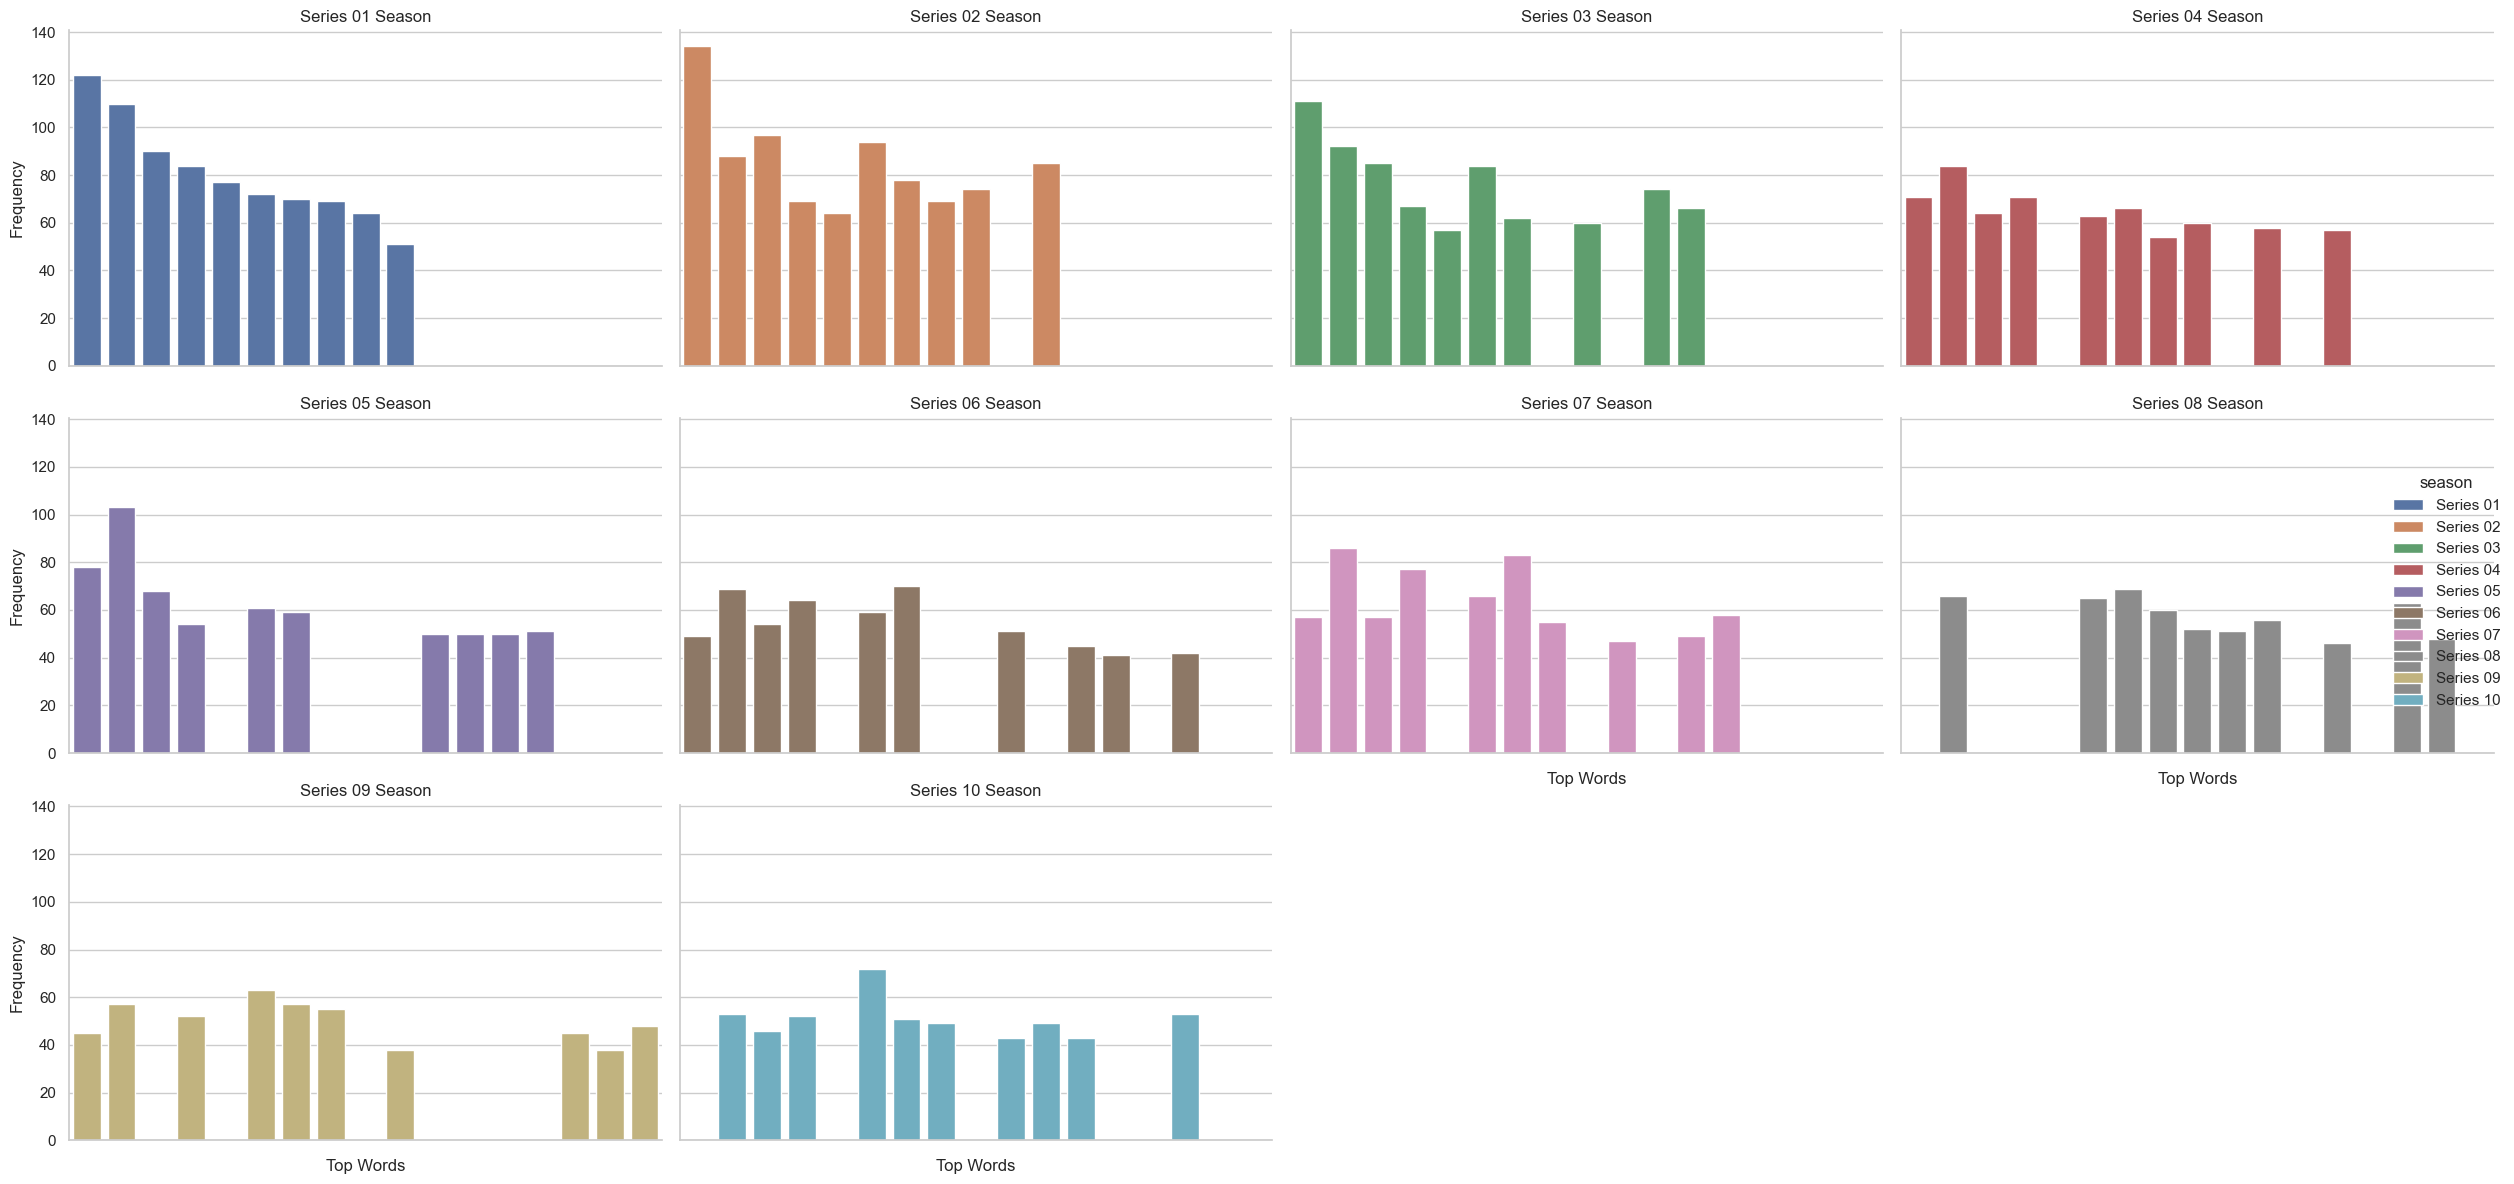

In [83]:
import seaborn as sns

# Initialize a dictionary to store top words for each season
top_words_per_season = {}

# Iterate over each season to get the top 10 words
for season in leonard['Season'].unique():
    # Get the processed dialogues for the current season
    season_dialogues = leonard[leonard['Season'] == season]['processed_dialogue']
    
    # Fit and transform the processed dialogues into a word count matrix
    X = vectorizer.fit_transform(season_dialogues)
    
    # Convert the word count matrix to a DataFrame
    word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Sum word counts across all dialogues in the season
    total_word_freq = word_freq_df.sum(axis=0)
    
    # Sort words by frequency
    sorted_word_freq = total_word_freq.sort_values(ascending=False)
    
    # Get the top 10 words for the current season
    top_words_per_season[season] = sorted_word_freq.head(10)

# Convert top_words_per_season to a DataFrame for plotting
top_words_list = []
for season, top_words in top_words_per_season.items():
    for word, freq in top_words.items():
        top_words_list.append({'season': season, 'word': word, 'freq': freq})

top_words_df = pd.DataFrame(top_words_list)

# Set up the plot
plt.figure(figsize=(15, 10))

# Create a facet grid with one plot per season
sns.set(style="whitegrid")
g = sns.catplot(
    data=top_words_df,
    kind="bar",
    x="word",
    y="freq",
    hue="season",
    col="season",
    col_wrap=4,  # Number of columns for facets
    height=4,
    aspect=1.5
)

# Rotate x-axis labels for readability
g.set_axis_labels("Top Words", "Frequency")
g.set_titles("{col_name} Season")
g.set_xticklabels(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

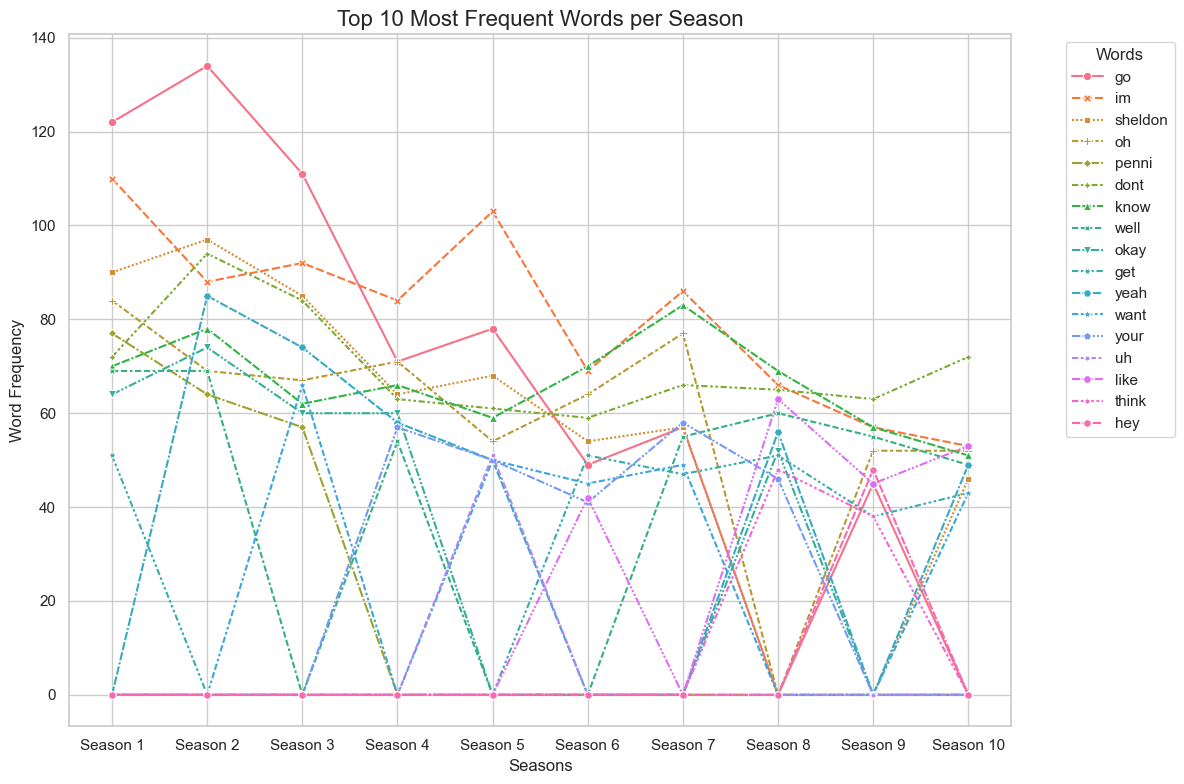

In [95]:
import seaborn as sns

## Create a DataFrame to store the word frequencies for all seasons
# Initialize a list to collect all words, preserving their order
all_words = []

# Collect all unique words across seasons for the plot
for season, top_words in top_words_per_season.items():
    all_words.extend(top_words.index)

# Remove duplicates by converting to a set and then back to a list (to maintain order)
all_words = list(dict.fromkeys(all_words))

# Create a DataFrame where rows are words and columns are seasons
word_frequencies_df = pd.DataFrame(index=all_words)

# Populate the DataFrame with the top word frequencies per season
for season, top_words in top_words_per_season.items():
    for word, freq in top_words.items():
        word_frequencies_df.at[word, f'Season {season}'] = freq

# Fill NaN values with 0 (in case a word is not in a particular season's top 10)
word_frequencies_df = word_frequencies_df.fillna(0)

# Plot the line graph
plt.figure(figsize=(12, 8))  # Set figure size
sns.lineplot(data=word_frequencies_df.T, markers=True)

# Add labels and title
plt.title('Top 10 Most Frequent Words per Season', fontsize=16)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Word Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Words', bbox_to_anchor=(1.05, 1), loc='upper left')

# Custom x-axis labels as you requested
custom_labels = ['Season 1', 'Season 2', 'Season 3', 'Season 4', 'Season 5', 
                 'Season 6', 'Season 7', 'Season 8', 'Season 9', 'Season 10']

# Set the x-ticks and labels
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels, rotation=0)

# Display the plot
plt.tight_layout()
plt.show()